# LAB 3 : Associative Networks 

Name : Hrishikesh Pable

Roll Number : 200010037

Referrence Material : **Chapter 4, page no. 90-110, Artificial Neural Network by B. Yegnanarayana**


# **Problem 1** : Demonstrate the working principle of two layer auto-associative network. Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Effect of orthonormal, orthogonal, linearly independent and linearly dependent input vectors.
3. 3. Use all 3 learning rules (i.e. by computation, Widrow and Hebbian), to find the optimal weight and mention their pros. and cons.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2.  First do it using computation method for each set of data (i.e orthogonal, orthonormal, linearly independent and linearly dependent (not all only few) case ), then take the performance as reference, to implement using Widrow and Hebbian learning.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



# Objectives
The objective in pattern association is to **design a network that can
represent the association in the pairs of vectors** $(a_l, b_l)$ , \
 $1 = 1, 2, ..., L$, through a set of weights to be determined by a learning law


![alt text](ass_net.png "Associative Network")



The activation value of the jth unit in the output layer is given by

$$ y_j = \sum_{i=1}^{M} w_{ji} a_{li} = w_j^T a_l \;\;\;\;\; j = 1,2,\ldots N $$

The output ($b_{lj}'$) of the jth unit is the same as its activation value
$y_j$, since the output function of the unit is linear, i.e., $b_{lj}' = y_j $

3 Methods for Learning weights:

## Computational Method

Here, we multiply B by the pseudo-inverse of A to get the weights:
$$ W = BA^{\dagger} $$

## Widrow's Law

A form of Widrow learning can be used to obtain $ W = BA^{\dagger} $ recursively:

$$W(l) = W(l-1) + \eta (b_l - W(l-1) a_l)a_l^T $$

where $\eta$ is a small positive constant called the learning rate
parameter. This Widrow's learning law can be implemented locally
by means of the following equation, 

$$ w_{ji} (l) = w_{ji} (l-1) + \eta (b_{ij} -\mathbf{w_j}^T (l-1)\mathbf{a_l}) a_{li} $$

## Hebb's Law

Consider the input-output pair ($\mathbf{a_l,b_l}$) applied to the linear associative
network. According to the Hebb's law, the updated weight value of a
connection depends only on the activations of the processing units on
either side of the connecting link. That is

$$ {W(l) = W(l-1) + b_l a_l^T }  $$



## Programming : 
  Please write a program to demonstrate the same

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
     

In [2]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data

#Orthogonal Input data
Orthogonal_inp = np.array([[1,1,-1,-1], [-1,1,1,-1], [-1,1,-1,1]])

# Orthonormal Input Vectors
Orthonormal_inp = ortho_group.rvs(dim=3)

#LI input
LI_inp = np.array([[-1,-1,-1],[1,-1,-1],[1,-1,1]])

# Linearly Dependent Vectors
LD_inp = np.array([[1,-1,-1],[-1,1,-1],[0,0,-2]])

# Output vectors
b_LI = np.array([1,2,1])* LI_inp
b_LD = np.array([1,2,1])*LD_inp
b_orthogonal = np.array([1,2,1])*Orthonormal_inp

In [3]:
def weights_by_computation(A,B):

  ## Here A is input and B is output, so Aw = B
  A_inv = np.linalg.pinv(A)
  weights = np.dot(B,A_inv) 
  b_est = np.dot(weights,A)
  error = (np.square(np.linalg.norm(B - b_est)))*(1/A.shape[1])
  
  return weights,error

In [4]:

# for linearly independent data
w_LI, err_LI = weights_by_computation(LI_inp, b_LI)
print("Computationally calculated weights for Linearly Independent data")
print()
print("Weights: ", w_LI)
print()
print('Error:', np.round(err_LI, 6))

Computationally calculated weights for Linearly Independent data

Weights:  [[1.50000000e+00 2.22044605e-16 5.00000000e-01]
 [5.00000000e-01 1.00000000e+00 5.00000000e-01]
 [5.00000000e-01 1.11022302e-16 1.50000000e+00]]

Error: 0.0


In [5]:
# for linearly dependent data
w_LD, err_LD = weights_by_computation(LD_inp, b_LD)
print("Computationally calculated weights for Linearly Independent data")
print()
print("Weights: ", w_LD)
print()
print('Error:', np.round((err_LD), 6))

Computationally calculated weights for Linearly Independent data

Weights:  [[ 0.91666667 -0.58333333  0.33333333]
 [-0.58333333  0.91666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]]

Error: 0.333333


In [6]:

# for Orthonormal data
w_orth, err_orth = weights_by_computation(Orthonormal_inp, b_orthogonal)
print("Computationally calculated weights for Linearly Independent data")
print()
print("Weights: ", w_orth)
print()
print('Error:', np.round(err_orth, 6))

Computationally calculated weights for Linearly Independent data

Weights:  [[1.00651824 0.0794649  0.01269194]
 [0.0794649  1.96876875 0.1547294 ]
 [0.01269194 0.1547294  1.024713  ]]

Error: 0.0


In [7]:
def weights_by_widrow(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  weights_init = (np.zeros((B.shape[0],A.shape[0]))) ## Initialise weights here
  error = []
  weights = weights_init
  for epoch in range(num_epochs):
    ## Write the widrow learning training loop here
        #calculating the output value
        b_est = np.dot(weights,A)           
        #calculating the error
        err = B - b_est

        weightChange = learning_rate*err
        weights += np.dot(weightChange,A.T)
        cost  = np.sum(np.square(err))/A.shape[0]
        error.append(cost)

  return weights,error



 Widrow learning law gives the following weights for Linearly Independent data 
 [[1.50000000e+00 3.16556265e-16 5.00000000e-01]
 [5.00000000e-01 1.00000000e+00 5.00000000e-01]
 [5.00000000e-01 2.50468497e-16 1.50000000e+00]]

 Error 
 0.0
[6.0, 2.56, 1.2456, 0.7108559999999998, 0.4684845599999998, 0.3408413256, 0.262174253256, 0.20735454576455992, 0.16615480629508553, 0.13393653782030443, 0.10825500773410927, 0.0876024646205071, 0.07092772335072701, 0.0574405576370107, 0.04652292830623054, 0.037682159511337444, 0.030522040734167945, 0.024722669945470486, 0.02002529675811714, 0.016220466650897825, 0.01313856944688349, 0.010642238177451906, 0.008620211816907487, 0.006982371173236798, 0.005655720506876825, 0.004581133558930043, 0.0037107181641428586, 0.0030056817062631552, 0.0024346021796638265, 0.001972027764660343, 0.0015973424890626342, 0.001293847416028323, 0.0010480164069424688, 0.0008488932896088324, 0.0006876035645779146, 0.0005569588873062171, 0.000451136698717358, 0.00036542072

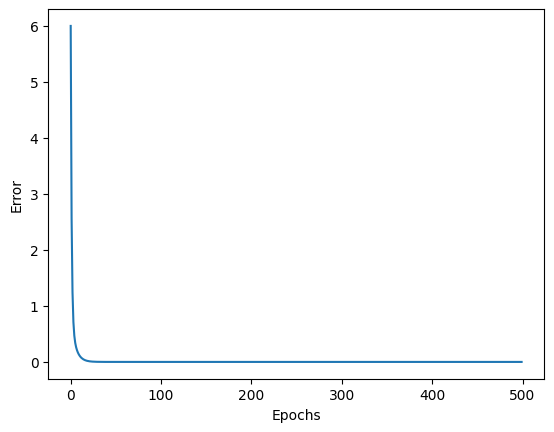

In [8]:

# for LI data 
x = np.arange(500)
w_LI, err_LI = weights_by_widrow(LI_inp, b_LI, 500, 0.1)
print("\n Widrow learning law gives the following weights for Linearly Independent data \n", w_LI)
print("\n Error \n", np.round(err_LI[-1],7))
print(err_LI)
plt.figure()
plt.plot(x,err_LI)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


 Widrow learning law gives the following weights for Linearly Dependent data 
 [[ 0.91666667 -0.58333333  0.33333333]
 [-0.58333333  0.91666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]]

 Error 
 0.3333333
[5.333333333333333, 1.7333333333333327, 0.7733333333333333, 0.48149333333333316, 0.38503253333333337, 0.3516829013333333, 0.3398972347733334, 0.3356896269653334, 0.33418052529902936, 0.333638150642292, 0.3334430400767678, 0.3333728233629232, 0.3333475490402982, 0.33333845087525066, 0.3333351756304092, 0.3333339965573983, 0.33333357209353554, 0.3333334192869324, 0.3333333642766172, 0.3333333444729137, 0.3333333373435819, 0.3333333347770227, 0.3333333338530615, 0.3333333335204354, 0.3333333334006901, 0.3333333333575818, 0.3333333333420628, 0.3333333333364759, 0.33333333333446463, 0.33333333333374066, 0.33333333333348, 0.3333333333333861, 0.33333333333335236, 0.33333333333334014, 0.33333333333333576, 0.3333333333333342, 0.33333333333333365, 0.3333333333333335, 0.333333333333

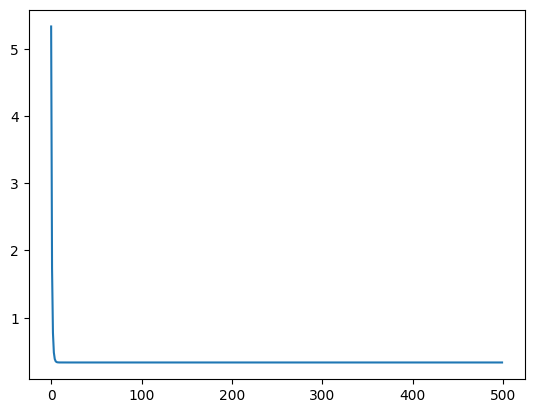

In [9]:

# for LD data 
x = np.arange(500)
w_LD, err_LD = weights_by_widrow(LD_inp, b_LD, 500, 0.1)
print("\n Widrow learning law gives the following weights for Linearly Dependent data \n", w_LD)
print("\n Error \n", np.round(err_LD[-1],7))
print(err_LD)
plt.figure()
plt.plot(x,err_LD)
plt.show()


 Widrow learning law gives the following weights for orthonormal data 
 [[1.00651824 0.0794649  0.01269194]
 [0.0794649  1.96876875 0.1547294 ]
 [0.01269194 0.1547294  1.024713  ]]

 Error computed
 0.0
[2.0, 1.6199999999999999, 1.3122, 1.062882, 0.8609344200000001, 0.6973568802000001, 0.564859072962, 0.4575358490992199, 0.37060403777036827, 0.3001892705939983, 0.24315330918113862, 0.19695418043672216, 0.15953288615374497, 0.12922163778453344, 0.10466952660547212, 0.08478231655043243, 0.06867367640585022, 0.055625677888738685, 0.04505679908987833, 0.0364960072628015, 0.029561765882869167, 0.02394503036512401, 0.019395474595750462, 0.015710334422557853, 0.01272537088227186, 0.010307550414640222, 0.00834911583585857, 0.00676278382704546, 0.005477854899906824, 0.0044370624689245375, 0.0035940205998288657, 0.0029111566858613723, 0.0023580369155477084, 0.0019100099015936511, 0.0015471080202908508, 0.0012531574964355886, 0.0010150575721128315, 0.0008221966334113905, 0.0006659792730632228, 0

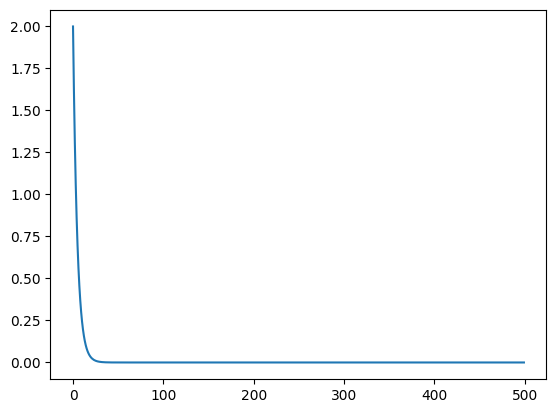

In [10]:

# for orthonormal data 
x = np.arange(500)
w_orth, err_orth = weights_by_widrow(Orthonormal_inp, b_orthogonal, 500, 0.1)
print("\n Widrow learning law gives the following weights for orthonormal data \n", w_orth)
print("\n Error computed\n", np.round(err_orth[-1],7))
print(err_orth)
plt.figure()
plt.plot(x,err_orth)
plt.show()

In [11]:
def weights_by_hebbian(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  weights_init = (np.zeros((B.shape[0],A.shape[0])))## Initialise weights here
  weights = weights_init
  error =[]
  for i in range(A.shape[1]):

    ## Write the hebbian learning training loop here
    input=np.matrix(A[:,i]).T
    d_op=np.matrix(B[:,i]).T

    del_weights = learning_rate*(d_op@input.T)
    weights = weights+del_weights

    err= B-weights@A
    error.append((np.square(np.linalg.norm(err)))*1/A.shape[1])

  return weights,error


 Hebbian Learning law gives following weights for Linearly Independent data 
 [[4. 2. 0.]
 [2. 4. 2.]
 [0. 2. 4.]]

 Error 
 46.0
[9.0, 33.0, 46.0]


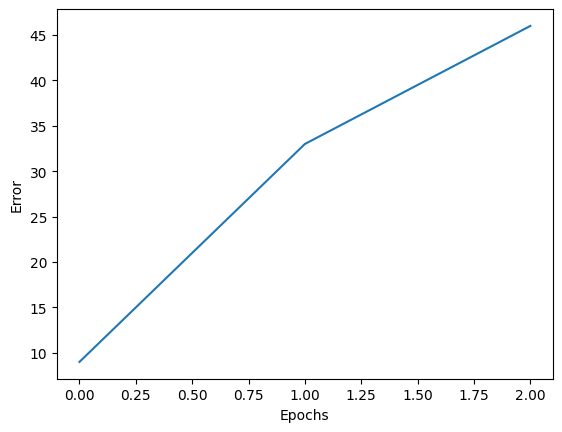

In [12]:

# for LI data 
x = np.arange(3)
w_LI, err_LI = weights_by_hebbian(LI_inp, b_LI, 500, 1)
print("\n Hebbian Learning law gives following weights for Linearly Independent data \n", w_LI)
print("\n Error \n", np.round(err_LI[-1],5))
print(err_LI)
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(x,err_LI)
plt.show()


 ### Weights for LD data through hebbian learning law
 [[ 4. -2.  2.]
 [-2.  4.  2.]
 [ 2.  2.  4.]]

 Error computed
 77.33333


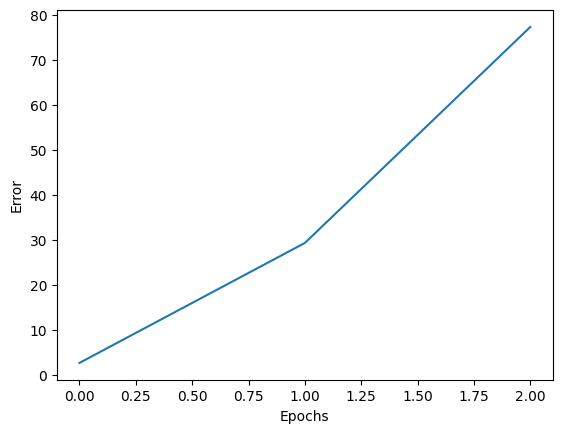

In [13]:

# for LD data 
x = np.arange(3)
w_LD, err_LD = weights_by_hebbian(LD_inp, b_LD, 500, 1)
print("\n ### Weights for LD data through hebbian learning law\n", w_LD)
print("\n Error computed\n", np.round(err_LD[-1],5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(x[:3],err_LD[:3])
plt.show()


 Hebbian Learning law gives following weights for orthonormal data 
 [[1.00651824 0.0794649  0.01269194]
 [0.0794649  1.96876875 0.1547294 ]
 [0.01269194 0.1547294  1.024713  ]]

 Error 
 0.0


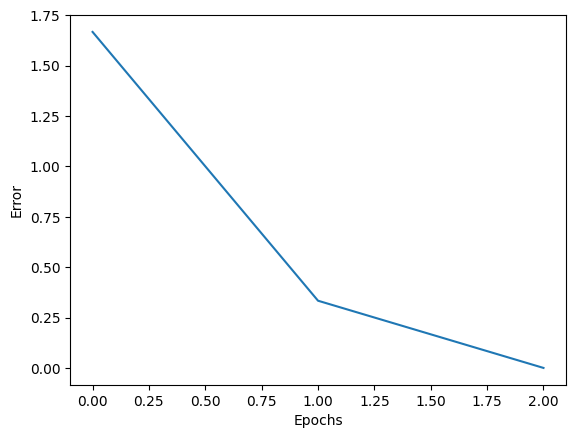

In [14]:
# for orthonormal data 
x = np.arange(3)
w_orth, err_orth = weights_by_hebbian(Orthonormal_inp, b_orthogonal, 500, 1)
print("\n Hebbian Learning law gives following weights for orthonormal data \n", w_orth)
print("\n Error \n", np.round(err_orth[-1],5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(x[:3],err_orth[:3])
plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

Conclusions:

1. For all other cases except for linearly dependent case, the error is zero. The error for LD case depends on rank of I/P matrix.

2. For orthogonal input vectors the optimum weights $W = BA^T$ can be obtained using Hebb's learning law.

3. For linearly independent or dependent input vectors, Widrow's
learning law gives an approximation to the optimum weights $W = BA^{\dagger} $

# **Problem 2** : Demonstrate the working principle of two layer associative network performing hetero-association task (i.e each input output pair is related with different functional relations).

Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Overcome the limitation by modifying the task to a pattern classification task.
3. Use computation and Widrow’s learning law to demonstrate the same.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2. First do it using computation method , then take the performance as reference, to
implement using Widrow learning.
3. Modify the data and network element such that the network will overcome the
limitation of limitation of no. of data points with the input dimensionality, and
perform pattern classification task.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



# Objectives
To perform hetero-association task using 2-layer associative network.

![alt-text](auto_associative_FFNN.png "Auto-Associative Feed Forward Neural Network")

In autoassociation the objective is to associate a given
pattern with itself during training, and then to recall the associated
pattern when an approximatelnoisy version of the same pattern is
given during testing.


So, $b_l = a_l$ for all $l$.




## Programming : 
  Please write a program to demonstrate the same

In [15]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data

inp1 = np.array([[1,1,0,0],[0,1,1,0],[0,1,0,1],[1,0,0,0]])
desired_op = np.array([[1,0],[1,1],[1,1],[1,0]])
print("input \n", inp1)
print("\n desired output\n",desired_op)
print("Input shape:", inp1.shape, "\nOutput shape: ", desired_op.shape)
     

input for M>L case 
 [[1 1 0 0]
 [0 1 1 0]
 [0 1 0 1]
 [1 0 0 0]]

 desired output
 [[1 0]
 [1 1]
 [1 1]
 [1 0]]
Input shape: (4, 4) 
Output shape:  (4, 2)


In [16]:
## You can use the same function defined above for computation method and widrow's learning law
x = np.arange(500)
weights, error = weights_by_computation(inp1, desired_op.T)
print("weights by computation for L are: ", weights)
print("\n Error computed\n", np.round(error,5))
print(error)


weights by computation for L are:  [[-1.00000000e+00  1.00000000e+00  1.00000000e+00  2.00000000e+00]
 [-2.22044605e-16  1.00000000e+00 -2.53304001e-16 -4.44089210e-16]]

 Error computed
 0.0
7.0629402132788815e-31



 ### Weights for L<M data through widrow learning 
 [[-9.98598014e-01  9.99509933e-01  9.99509933e-01  1.99837131e+00]
 [ 1.21831140e-04  9.99957414e-01 -4.25863014e-05 -1.41531496e-04]]
Error Computed:  0.0
[1.5, 0.7375, 0.45124999999999993, 0.3344905, 0.27982882750000004, 0.24923570355000002, 0.2289290991315, 0.21368516745715746, 0.20135975113434065, 0.19095928269075235, 0.18195010133027523, 0.17400307859607747, 0.1668935162055032, 0.160458013599742, 0.15457334058235467, 0.1491445608554487, 0.14409753482023288, 0.13937379251001186, 0.13492685150463588, 0.13071949507653036, 0.12672172415386246, 0.12290919783342094, 0.11926203532944747, 0.11576388895739773, 0.11240122242007371, 0.10916274588812588, 0.10603897168175806, 0.10302186330371799, 0.10010455714366984, 0.09728114104658288, 0.09454647758196583, 0.09189606259765135, 0.08932591172760258, 0.0868324691179969, 0.08441253386315349, 0.08206320059309771, 0.07978181139433509, 0.07756591682426549, 0.07541324423466507, 0.07332167197876513

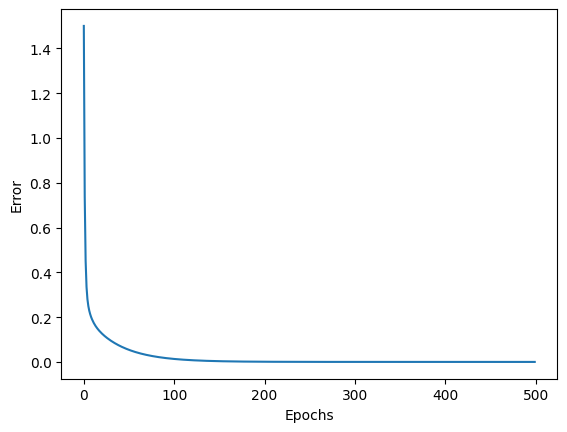

In [17]:
#weights by widrow learning
x = np.arange(500)
weight_3, error_3 = weights_by_widrow(inp1, desired_op.T,500,0.1)
print("\n ### Weights through widrow learning \n", weight_3)
print("Error Computed: ", np.round(error_3[-1],5))
print(error_3)
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(x,error_3)
plt.show()


 ### Weights for L<M data through hebbian learning 
 [[0.2 0.2 0.2 0.1]
 [0.1 0.2 0.1 0. ]]
Error Computed:  0.7375
[1.3625, 0.9474999999999997, 0.8025000000000001, 0.7374999999999999]


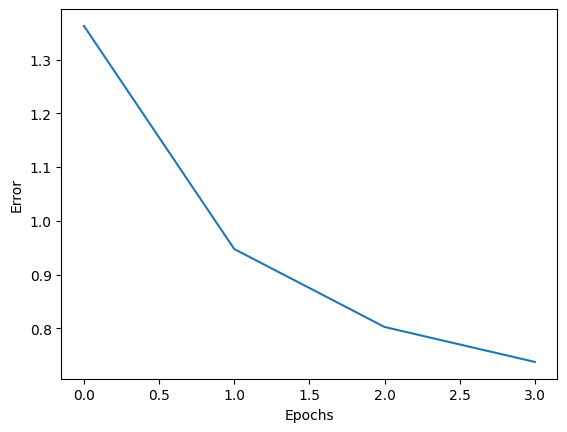

In [18]:
#weights by hebbian learning
x = np.arange(4)
weight_3, error_3 = weights_by_hebbian(inp1, desired_op.T,500,0.1)
print("\n ### Weights through hebbian learning \n", weight_3)
print("Error Computed: ", np.round(error_3[-1],5))
print(error_3)
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(x,error_3)
plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

1. The network is capable of learning associations between input and output pairs with different functional relations.

2. The network learns these associations by doing assigning different pattern classes and then performing classification.

3. Here, we can learn the weights by any of the methods: computational, Widrow's or Hebb's.